In [1]:
from environment.models import SinusoidalControlledFixedEnv

import matplotlib.pyplot as plt
import numpy as np

In [7]:
env = SinusoidalControlledFixedEnv(max_t=100, sinusoidal_components=1)
env.delta_t = 0.1
env.latency = 20
print(env.max_t)

100.0


[[0.3205932159100018, 0.1284413439962394], [0.3118674370932797, 0.1600456606928099], [0.34664339747032724, 0.21784850569738845], [0.41885426995148095, 0.29894735899084124], [0.5164307522220701, 0.39270259850764844], [0.6237078065324225, 0.4831253504952392], [0.7246584854305962, 0.5532664850998315], [0.8062284630093371, 0.5904880714469266], [0.8609443084023063, 0.5910083178621595], [0.8880746755967193, 0.5617553097470149], [0.8929637940971543, 0.5181628955773008], [0.8847058025337873, 0.47845585741891483], [0.8729340677240539, 0.45715738304756914], [0.8648812020705328, 0.461167969810393], [0.8637657579551985, 0.49004278084357894], [0.8689539461505704, 0.5393228376566434], [0.8775120352048763, 0.6040739289809144], [0.886157387285043, 0.6801323596423726], [0.8925750104993043, 0.7623257539901226], [0.8956072040990055, 0.8410027195667136]]


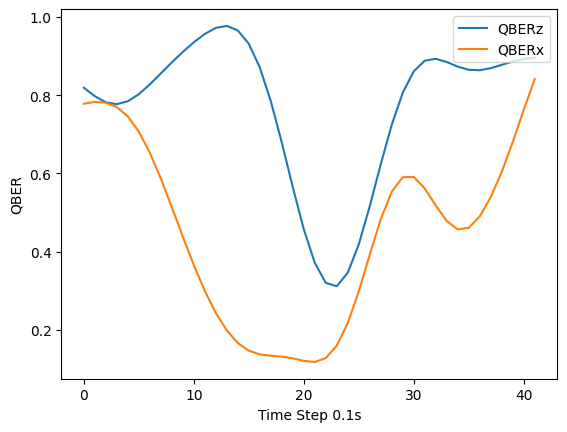

In [10]:
env.reset()

while not env.done:
    s, r, done = env.step()
    print(s)
    break

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

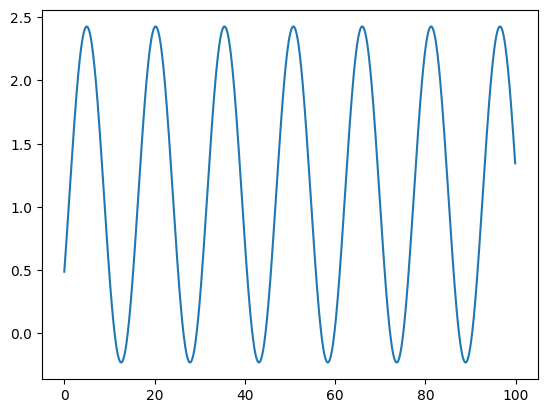

In [4]:
from environment.control import sinusoidal_control
from random import gauss

t = np.arange(0,env.max_t,env.delta_t)
_c = []
c = [np.array([gauss(0,1) for _ in range(4)])]
for i in range(len(t)):
    _c.append(sinusoidal_control(t[i], c))
plt.plot(t,_c)

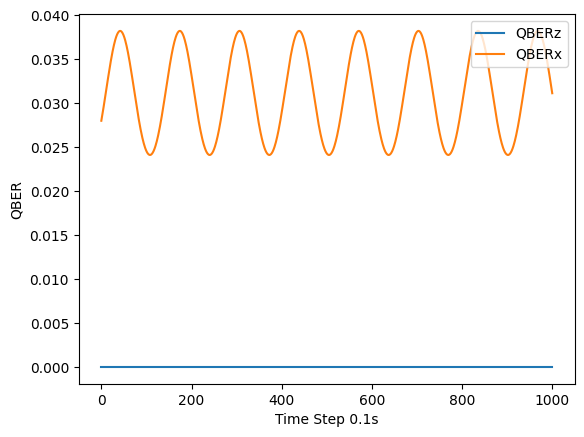

In [5]:
env.fixed_errors_flags = [True, True, True, True,
                          False, True, True, True,
                          True, True, True, True]

env.reset()

while not env.done:
    env.step()

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()

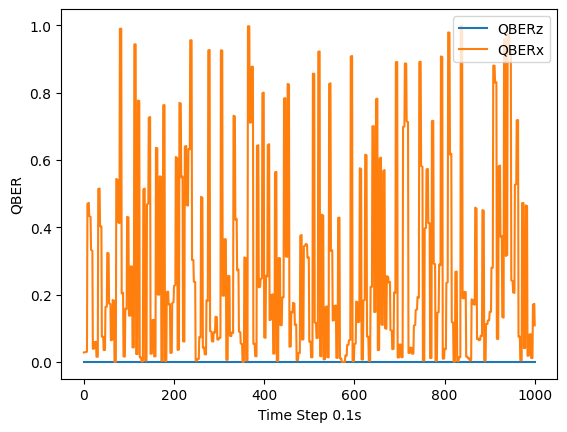

In [6]:
env.reset()

while not env.done:
    c = [gauss(0,1) for _ in range(4)]
    env.step(a_alice=[np.array(c), np.zeros(4), np.zeros(4), np.zeros(4)])

QBER = env.get_qber()

plt.plot(QBER[:,0],label='QBERz')
plt.plot(QBER[:,1],label='QBERx')
plt.legend(loc = 'upper right')
plt.ylabel('QBER')
plt.xlabel(f'Time Step {env.delta_t}s')
plt.show()